### IRIS 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋: iris.csv 4개 feature (3개 피쳐, 1개 타겟) 사용
- Linear regression
- 너비 예측
- 구현_프레임워크: Pytorch

In [33]:
import torch					# 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn			# 인공신경망 관련 모듈
import torch.nn.functional as F 	# 손실, 거래 등 함수 관련 모듈
import torch.optim as optimizer # 최적화 기법 관련 모듈

import pandas as pd				# 데이터 파일 분석 관련 모듈

In [34]:
DATA_FILE = r'C:\Users\KDP-43\Desktop\머신러닝_1\data\iris.csv'

irisDF = pd.read_csv(DATA_FILE, usecols=[0,1,2,3])			# 컬럼 2개만 사용
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


[2] 모델 준비
- 학습방법: 지도학습 >> 회귀
- 알고리즘: 선형관계 >> 선형모델 >> nn.Linear

In [35]:
# in_features	: petal.length 3개
# out_features	: petal.width  1개

model = nn.Linear(3,1)

In [36]:
# 가중치와 절편 확인
for name, param in model.named_parameters():
	print(f'[{name}] {param}', end='\n\n')

[weight] Parameter containing:
tensor([[-0.4252,  0.2362,  0.2893]], requires_grad=True)

[bias] Parameter containing:
tensor([0.4483], requires_grad=True)



[3] 최적화 인스턴스 준비
- 모델의 가중치 & 절편 최적화
- 최적화 결과 인스턴스에 전달 		=> optimizer.step()

In [37]:
adam_optim = optimizer.Adam(model.parameters(), lr = 0.1)		# model.parameter() -> weight, bias

''' 
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)
'''

' \nAdam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.999)\n    capturable: False\n    differentiable: False\n    eps: 1e-08\n    foreach: None\n    fused: None\n    lr: 0.1\n    maximize: False\n    weight_decay: 0\n)\n'

[4] 학습
- 개발자가 구현 
- 알아서 잘~~~~~~~~~~~~ 8ㅅ8

- [4-1] 데이터셋 Tensor화 진행
	* 데이터 준비 시 or 학습 전

In [38]:
irisDF[['petal.length']][:10]

,petal.length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
5,1.7
6,1.4
7,1.5
8,1.4
9,1.5


In [39]:
irisDF[['petal.length']][:10].values

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5]])

In [40]:
irisDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [41]:
# 2D
featureTS = torch.from_numpy( irisDF[['sepal.length', 'sepal.width', 'petal.length']].values ).float()			
featureTS.shape

torch.Size([150, 3])

In [42]:
targetTS = torch.from_numpy( irisDF[['petal.width']].values).float()				# 2D
targetTS.shape

torch.Size([150, 1])

- [4-2] 학습진행
	* 학습횟수 결정		=> epoch 설정
	* 학습결과 저장		=> 손실 저장 변수

In [43]:
EPOCH = 500


# 모델 학습 함수수
def training(EPOCH):
	loss_history = []				# epoch 횟수에 따른 loss 시각화 용!!

	# 모델 학습 EPOCH 만큼
	for epoch in range(EPOCH):
		# (1) 학습진행 - forward			
		pre_y = model(featureTS)
	
		# (2) 오차계산 - 손실함수
		loss = F.mse_loss(pre_y, targetTS)
		loss_history.append(loss.item())					# loss는 텐서!! 
															# numpy 값만 저장하기 위해 loss.item()
		# (3) 최적화   - 가중치, 절편 업데이트 - backward, step
		# 			=> 업데이트 안하면 모든 epoch에 대해 가중치,절편 똑같은 값!
		adam_optim.zero_grad()
		loss.backward()
		adam_optim.step()
	
		# (4) 학습결과 출력&저장 
		# print(f'[{epoch}/{EPOCH}] LOSS: {loss} ')

	return loss_history

In [44]:
loss_per_epoch = training(EPOCH)
# loss_per_epoch

In [45]:
type(loss_per_epoch)

list

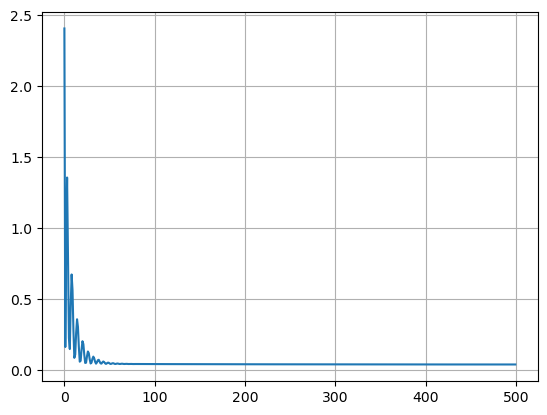

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.grid()
plt.show()